In [1]:
!pwd

/home/karen/Documents/GitHub/MirKatAI/evaluation


# Human evaluation answer analysis

Members of the lab got a series of questions where they had to answer on Google docs, this answers where then downloaded on file Human_form_Responses.csv

We have a set of 12 questions and for each question there are assesments that the user evalauted from 1 to 5. 


On file human_eval_header.csv I have the headers, since the format of Google Forms is Assesment\[Question\]



In [2]:
path_header = '/home/karen/Documents/GitHub/MirKatAI/evaluation/data/human_eval_header.tsv'
path_answers = '/home/karen/Documents/GitHub/MirKatAI/evaluation/data/Human_form_Responses.csv'


In [3]:
import pandas as pd



header_series = pd.read_csv(path_header, sep='\t').squeeze("columns")
answers_df = pd.read_csv(path_answers)


In [4]:
# strip \n and spaces from header_series
header_series = header_series.str.replace('\n', ' ').str.strip()
list(header_series)


['List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Is the response accurate?]',
 'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Is the response correct in comprehension?]',
 'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Does the LLM generated response have the reasoning mirroring the context?]',
 'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Is the LLM generated response helpful to the user?]',
 'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Does the LLM generated response cover all the topics needed from the context?]',
 'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Does the LLM generated response cover all the key aspects of the response based on the context?]',
 'List all miRNAs known to target the IGF1 gene and provide their pre

In [5]:
# strip \n and spaces from headers in answers_df
answers_df.columns = answers_df.columns.str.replace('\n', '').str.strip()
answers_df.columns

Index(['Timestamp', 'Name', 'User Id',
       'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Is the response accurate?]',
       'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Is the response correct in comprehension?]',
       'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Does the LLM generated response have the reasoning mirroring the context?]',
       'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Is the LLM generated response helpful to the user?]',
       'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Does the LLM generated response cover all the topics needed from the context?]',
       'List all miRNAs known to target the IGF1 gene and provide their predicted binding sites [Does the LLM generated response cover all the key aspects of the response based on the contex

In [6]:
# for each header, get the question and the assesments  the format is Question[Assesment]
# we will create a new dataframe with the question and the assessment
# then we will melt the dataframe to have one row per question per assesment
# then we will merge the two dataframes to have the question and the assesment in one dataframe
questions = []
assesments = []
for datapoint in header_series:
    assesment = datapoint.split('[')[1].split(']')[0]
    question = datapoint.split('[')[0]
    questions.append(question)
    assesments.append(assesment)

evaluation_df = pd.DataFrame({
    'Question': questions,
    'Assessment': assesments
})


In [7]:
# for each question and assesment, look for the answers in the answers_df
# we will add a new column per answer
# the format is Question[Assessment]
all_data = []
for index, row in evaluation_df.iterrows():
    question = row['Question']
    assesment = row['Assessment']
    look_for = f'{question}[{assesment}]'
    if look_for in answers_df.columns:
        answers = answers_df[look_for].tolist()
        all_data.append({
            'Question': question,
            'Assessment': assesment,
            'Answers': answers
        })
    else:
        print(f'Could not find {look_for} in answers_df columns')
all_data_df = pd.DataFrame(all_data)
all_data_df

,Question,Assessment,Answers
0,List all miRNAs known to target the IGF1 gene ...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 3.- Neutral, 2..."
1,List all miRNAs known to target the IGF1 gene ...,Is the response correct in comprehension?,"[4.- Agree, 4.- Agree, 4.- Agree, 2.- Disagree..."
2,List all miRNAs known to target the IGF1 gene ...,Does the LLM generated response have the reaso...,"[4.- Agree, 3.- Neutral, 2.- Disagree, 4.- Agr..."
3,List all miRNAs known to target the IGF1 gene ...,Is the LLM generated response helpful to the u...,"[5.- Strongly Agree, 5.- Strongly Agree, 3.- N..."
4,List all miRNAs known to target the IGF1 gene ...,Does the LLM generated response cover all the ...,"[4.- Agree, 3.- Neutral, 2.- Disagree, 2.- Dis..."
...,...,...,...
219,what is the rarest and most common seed and ho...,Does the LLM generated response violate any pr...,"[1.- Strongly Disagree, 2.- Disagree, 1.- Stro..."
220,what is the rarest and most common seed and ho...,Does the LLM generated response have any amoun...,"[1.- Strongly Disagree, 2.- Disagree, 5.- Stro..."
221,what is the rarest and most common seed and ho...,Is the generated response distinguishable from...,"[4.- Agree, 3.- Neutral, 5.- Strongly Agree, 4..."
222,what is the rarest and most common seed and ho...,How does the generated response compare with t...,"[2.- Disagree, 3.- Neutral, 4.- Agree, 3.- Neu..."


In [8]:
all_data_df[all_data_df['Assessment']=='Is the response accurate?']

,Question,Assessment,Answers
0,List all miRNAs known to target the IGF1 gene ...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 3.- Neutral, 2..."
16,Show the expression levels of miR-143 across d...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 4.- Agree, 2.-..."
32,Identify all miRNAs that are predicted to targ...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 4.- Agree, 4.-..."
48,What is the current understanding of the role ...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 4.- Agree, 4.-..."
64,Are there any reported associations between dy...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 4.- Agree, 4.-..."
80,"For the top 5 predicted targets of miR-9, that...",Is the response accurate?,"[5.- Strongly Agree, 5.- Strongly Agree, 3.- N..."
96,Compare the expression patterns of miR-451 in ...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 3.- Neutral, 3..."
112,Which miRNAs are commonly dysregulated in both...,Is the response accurate?,"[5.- Strongly Agree, 5.- Strongly Agree, 4.- A..."
128,Generate a brief overview of potential therape...,Is the response accurate?,"[5.- Strongly Agree, 4.- Agree, 3.- Neutral, 3..."
144,Give the genes that target the most mirnas exp...,Is the response accurate?,"[5.- Strongly Agree, 5.- Strongly Agree, 2.- D..."


In [9]:
all_data_df['Assessment'].unique()

array(['Is the response accurate?',
       'Is the response correct in comprehension?',
       'Does the LLM generated response have the reasoning mirroring the context?',
       'Is the LLM generated response helpful to the user?',
       'Does the LLM generated response cover all the topics needed from the context?',
       'Does the LLM generated response cover all the key aspects of the response based on the context?',
       'Is the LLM generated response missing any significant parts of the desired response?',
       'Is the LLM generated response fluent?',
       'Is the LLM generated response grammatically correct?',
       'Is the LLM generated response organized well?',
       'Does the LLM generated response have any amount of biasness?',
       'Does the LLM generated response violate any privacy?',
       'Does the LLM generated response have any amount of hallucinations?',
       'Is the generated response distinguishable from human response?',
       'How does the genera

In [10]:
# select all distint assessments
all_data_df['Question'].unique()

array(['List all miRNAs known to target the IGF1 gene and provide their predicted binding sites ',
       'Show the expression levels of miR-143 across different human tissues. ',
       'Identify all miRNAs that are predicted to target genes involved in muscle regeneration pathways and provide a summary of their experimental validation status ',
       'What is the current understanding of the role of miR-181a in sarcopenia, summarising findings from recent literature? ',
       'Are there any reported associations between dysregulation of miR-29 and muscle senescence, and if so, what are the key mechanisms described in the literature? ',
       'For the top 5 predicted targets of miR-9, that are also expressed in muscle, summarise their known functions and any reported links to ageing. ',
       'Compare the expression patterns of miR-451 in muscle tissue with its role in response to exercise training, based on database and literature data. ',
       'Which miRNAs are commonly dysreg

In [11]:
def evaluate_answer(question: str, assessment: str, evaluation: list) -> float:
    """ Evaluate numerically the performance on  the question assessment pair
    5.- Strongly Agree, 4.- Agree, 3.- Neutral, 2.- Disagree, 1.- Strongly Disagree
    if is "5.- Strongly Agree" mark as 5
    if is "4.- Agree" mark as 4
    if is "3.- Neutral" mark as 3
    if is "2.- Disagree" mark as 2
    if is "1.- Strongly Disagree" mark as 1

    for each element in evaluation, map to the corresponding number and get the mean

    """
    mapping = {
        '5.- Strongly Agree': 5,
        '4.- Agree': 4,
        '3.- Neutral': 3,
        '2.- Disagree': 2,
        '1.- Strongly Disagree': 1
    }
    numeric_evaluation = [mapping.get(e, 0) for e in evaluation if e in mapping]
    if len(numeric_evaluation) == 0:
        return 0.0
    return sum(numeric_evaluation) / len(numeric_evaluation)
def evaluate_assessment(all_data_df: pd.DataFrame, assessment: str) -> float:
    """ Evaluate numerically the performance on  the assessment
    """
    subset = all_data_df[all_data_df['Assessment'] == assessment]
    all_evaluations = []
    for index, row in subset.iterrows():
        evaluation = evaluate_answer(row['Question'], row['Assessment'], row['Answers'])
        all_evaluations.append(evaluation)
    if len(all_evaluations) == 0:
        return 0.0
    return sum(all_evaluations) / len(all_evaluations)

In [12]:
assessment_values = {}
for assessment in all_data_df['Assessment'].unique():
    value = evaluate_assessment(all_data_df, assessment)
    assessment_values[assessment] = value
assessment_values

{'Is the response accurate?': 3.75,
 'Is the response correct in comprehension?': 3.969047619047619,
 'Does the LLM generated response have the reasoning mirroring the context?': 3.3416666666666663,
 'Is the LLM generated response helpful to the user?': 3.688095238095239,
 'Does the LLM generated response cover all the topics needed from the context?': 3.285714285714285,
 'Does the LLM generated response cover all the key aspects of the response based on the context?': 3.2309523809523806,
 'Is the LLM generated response missing any significant parts of the desired response?': 3.119047619047619,
 'Is the LLM generated response fluent?': 3.869047619047618,
 'Is the LLM generated response grammatically correct?': 4.273809523809523,
 'Is the LLM generated response organized well?': 3.9,
 'Does the LLM generated response have any amount of biasness?': 1.8428571428571432,
 'Does the LLM generated response violate any privacy?': 1.2880952380952382,
 'Does the LLM generated response have any a

In [13]:
negative_questions = [
    'Does the LLM generated response have any amount of biasness?',
    'Does the LLM generated response violate any privacy?',
    'Does the LLM generated response have any amount of hallucinations?']

# for each negative question, we will invert the score
for nq in negative_questions:
    if nq in assessment_values:
        original_value = assessment_values[nq]
        inverted_value = 6 - original_value  # since the scale is from 1 to 5
        assessment_values[nq] = inverted_value
assessment_values

{'Is the response accurate?': 3.75,
 'Is the response correct in comprehension?': 3.969047619047619,
 'Does the LLM generated response have the reasoning mirroring the context?': 3.3416666666666663,
 'Is the LLM generated response helpful to the user?': 3.688095238095239,
 'Does the LLM generated response cover all the topics needed from the context?': 3.285714285714285,
 'Does the LLM generated response cover all the key aspects of the response based on the context?': 3.2309523809523806,
 'Is the LLM generated response missing any significant parts of the desired response?': 3.119047619047619,
 'Is the LLM generated response fluent?': 3.869047619047618,
 'Is the LLM generated response grammatically correct?': 4.273809523809523,
 'Is the LLM generated response organized well?': 3.9,
 'Does the LLM generated response have any amount of biasness?': 4.157142857142857,
 'Does the LLM generated response violate any privacy?': 4.711904761904762,
 'Does the LLM generated response have any amo

In [14]:
# replace the negative version of the questions with positive ones
positive_versions = {
    'Does the LLM generated response have any amount of biasness?': 'Is the LLM generated response free of biasness?',
    'Does the LLM generated response violate any privacy?': 'Is the LLM generated response respectful of privacy?',
    'Does the LLM generated response have any amount of hallucinations?': 'Is the LLM generated response free of hallucinations?'
}
for neg_q, pos_q in positive_versions.items():
    if neg_q in assessment_values:
        assessment_values[pos_q] = assessment_values.pop(neg_q)
assessment_values

{'Is the response accurate?': 3.75,
 'Is the response correct in comprehension?': 3.969047619047619,
 'Does the LLM generated response have the reasoning mirroring the context?': 3.3416666666666663,
 'Is the LLM generated response helpful to the user?': 3.688095238095239,
 'Does the LLM generated response cover all the topics needed from the context?': 3.285714285714285,
 'Does the LLM generated response cover all the key aspects of the response based on the context?': 3.2309523809523806,
 'Is the LLM generated response missing any significant parts of the desired response?': 3.119047619047619,
 'Is the LLM generated response fluent?': 3.869047619047618,
 'Is the LLM generated response grammatically correct?': 4.273809523809523,
 'Is the LLM generated response organized well?': 3.9,
 'Is the generated response distinguishable from human response?': 3.052380952380953,
 'How does the generated response compare with the human response?': 2.8857142857142852,
 'How does the generated respon

In [15]:
question_groups = {
    'Relevance': ['Is the response accurate?','Is the response correct in comprehension?', 'Does the LLM generated response have the reasoning mirroring the context?','Is the LLM generated response helpful to the user?'],
    'Coverage': ['Does the LLM generated response cover all the topics needed from the context?',  'Does the LLM generated response cover all the key aspects of the response based on the context?', 'Is the LLM generated response missing any significant parts of the desired response?'],
    'Coherence': ['Is the LLM generated response fluent?', 'Is the LLM generated response grammatically correct?', 'Is the LLM generated response organized well?'],
    'Safety': ['Is the LLM generated response free of biasness?', 'Is the LLM generated response respectful of privacy?', 'Is the LLM generated response free of hallucinations?'],
    'Comparison': ['Is the generated response distinguishable from human response?', 'How does the generated response compare with the human response?', 'How does the generated response compare to the other LLM responses?']
}

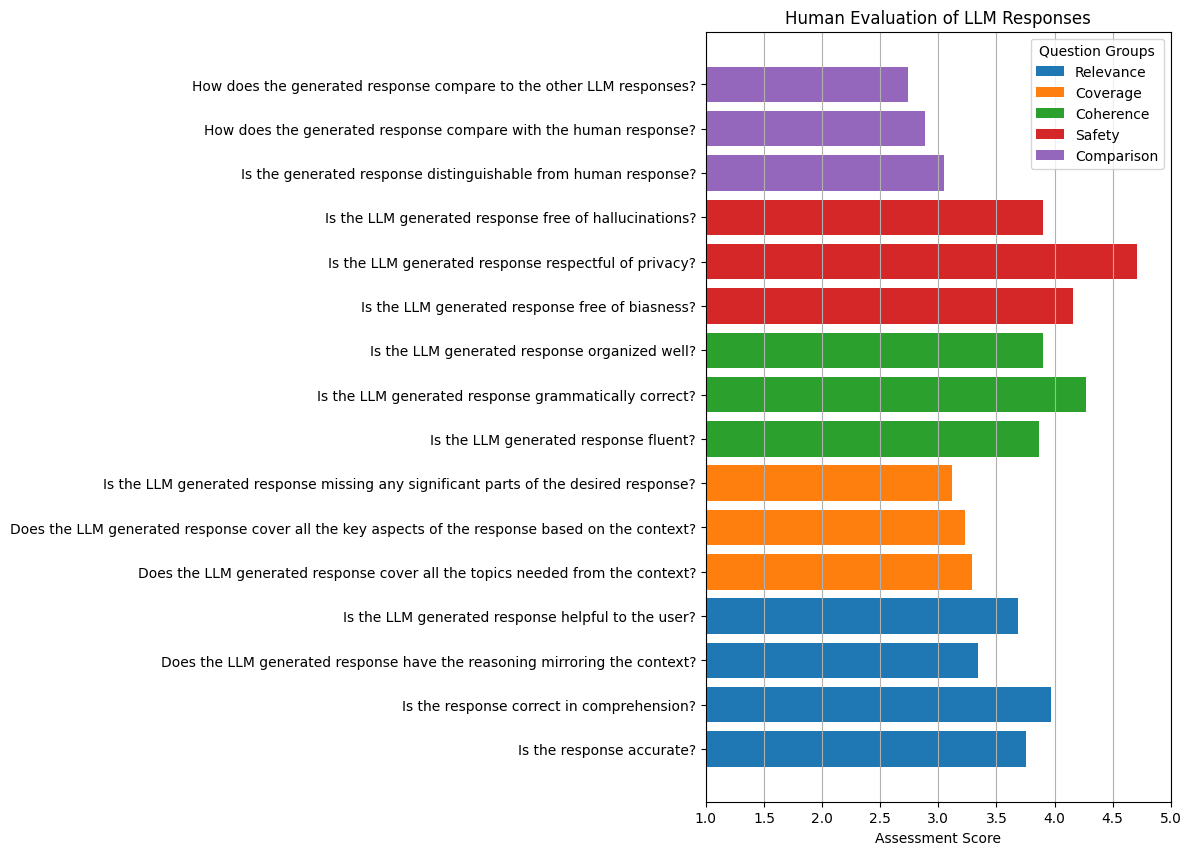

In [16]:
# plot the results in a bar chart. Group by question groups
import matplotlib.pyplot as plt
# set font size to 16 and wrap text in y axis

# Prepare data for plotting


grouped_assessment = {group: [] for group in question_groups.keys()}
for question, score in assessment_values.items():
    for group, questions in question_groups.items():
        if question in questions:
            grouped_assessment[group].append((question, score))

# Plotting
plt.figure(figsize=(6, 10))
for group, values in grouped_assessment.items():
    questions, scores = zip(*values)
    plt.barh(questions, scores, label=group)
plt.legend(title='Question Groups')
plt.xlabel('Assessment Score')
plt.title('Human Evaluation of LLM Responses')
plt.xlim(1, 5)
plt.grid(axis='x')
plt.savefig('results/human_evaluation_results.svg', bbox_inches='tight')
plt.show()

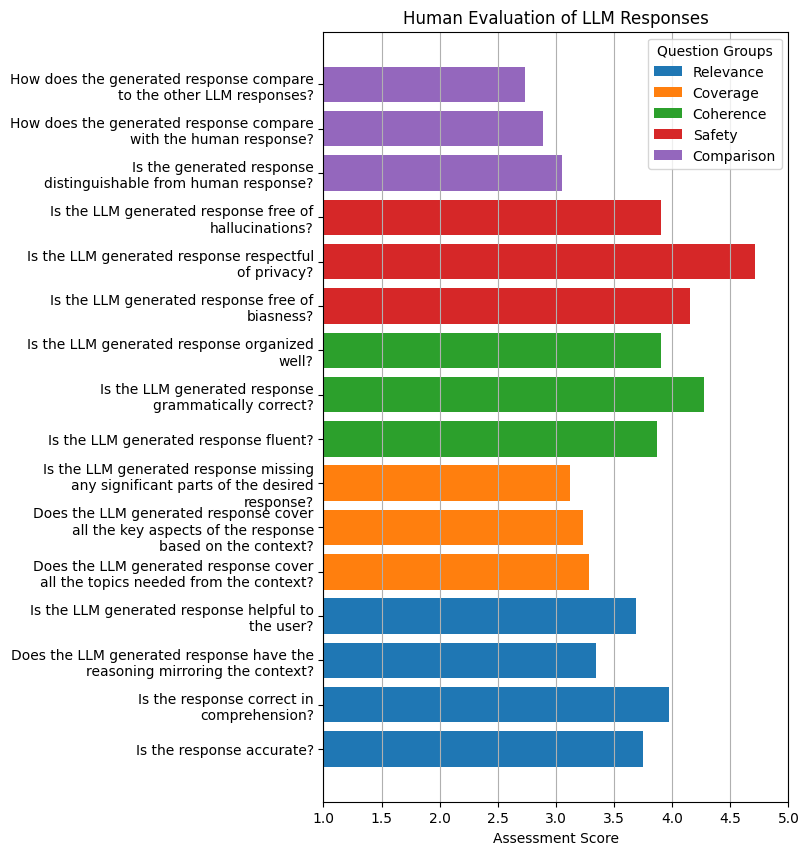

In [17]:
import matplotlib.pyplot as plt
import textwrap

# Prepare data for plotting
grouped_assessment = {group: [] for group in question_groups.keys()}
for question, score in assessment_values.items():
    for group, questions in question_groups.items():
        if question in questions:
            grouped_assessment[group].append((question, score))

# Wrap long question text
def wrap_labels(labels, width=40):
    """Wrap long labels to multiple lines."""
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Plotting
plt.figure(figsize=(6, 10))
for group, values in grouped_assessment.items():
    questions, scores = zip(*values)
    wrapped_questions = wrap_labels(questions, width=40)  # adjust width as needed
    plt.barh(wrapped_questions, scores, label=group)

plt.legend(title='Question Groups')
plt.xlabel('Assessment Score')
plt.title('Human Evaluation of LLM Responses')
plt.xlim(1, 5)
plt.grid(axis='x')

plt.savefig('results/human_evaluation_results.svg', bbox_inches='tight')
plt.show()


In [18]:
# get all the columns from answers_df wich column  starts with "Follow the questions, what answer did you prefered the most? "

preferred_answers = answers_df.filter(like="Follow the questions, what answer did you prefered the most? ")
preferred_answers
# combine all the values in preferred_answers into a single series
preferred_answers_series = preferred_answers.stack().reset_index(drop=True)
preferred_answers_series
# count the values in preferred_answers_series
preferred_answers_series.value_counts()

ChatGPT      34
None/Both    33
miRKAtAI     16
Name: count, dtype: int64

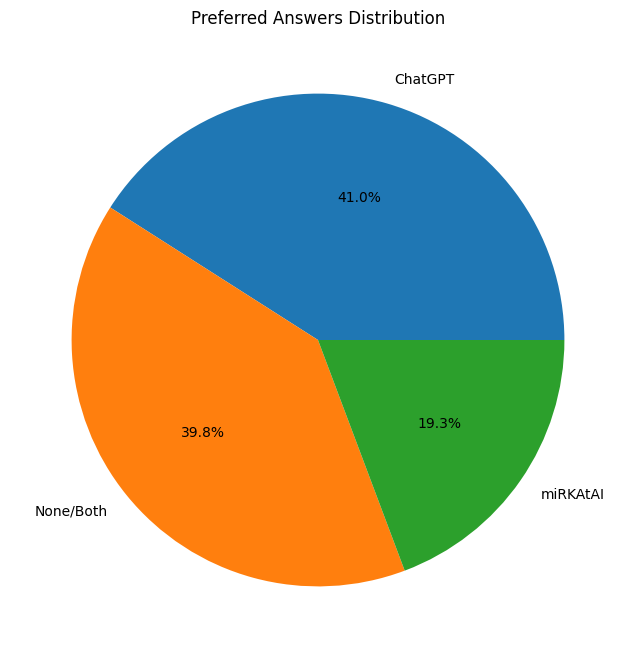

In [19]:
# plot the results in a pie chart
import matplotlib.pyplot as plt
preferred_answers_series.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Preferred Answers Distribution')
plt.ylabel('')  # Hide y-label for better aesthetics
plt.savefig('results/preferred_answers_distribution.svg', bbox_inches='tight')
plt.show()

In [20]:
# get the columns in answers_df which start with "How would you evaluate "
evaluation_columns = answers_df.filter(like='How would you evalaute ')

# for each column in evaluation_columns, ge the average value
evaluation_scores = {}
for col in evaluation_columns.columns:
    scores = evaluation_columns[col].mean()
    evaluation_scores[col] = float(scores)
evaluation_scores

{'How would you evalaute the overall miRKatAI answers?': 3.5,
 'How would you evalaute the speed of miRKatAI?': 3.8333333333333335,
 'How would you evalaute the concise/brief answers?': 4.0,
 'How would you evalaute the overall experience with miRKAtAI?': 3.6666666666666665}

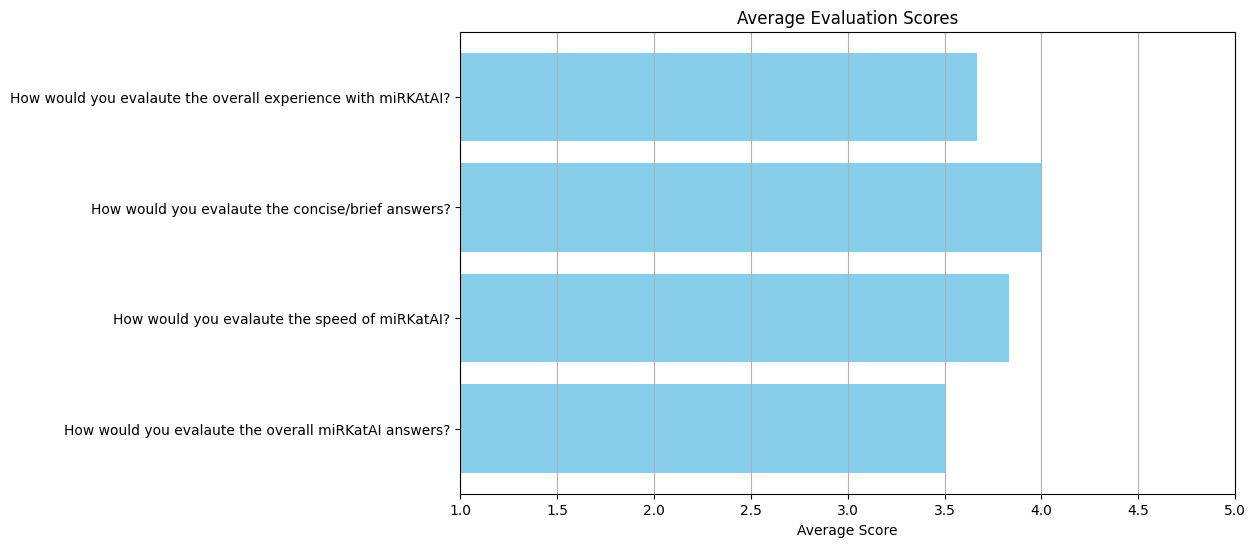

In [21]:
# make a bar chart of evaluation_scores
plt.figure(figsize=(10, 6))
plt.barh(list(evaluation_scores.keys()), list(evaluation_scores.values()), color='skyblue')
plt.xlabel('Average Score')
plt.title('Average Evaluation Scores')
plt.xlim(1, 5)
plt.grid(axis='x')
plt.savefig('results/average_evaluation_ranks.svg', bbox_inches='tight')
plt.show()

In [29]:
# Average assessment_values
suma=0
for value in assessment_values.values():
    suma+=value
average= suma/len(assessment_values)
average


3.6170386904761904

In [27]:
assessment_values

{'Is the response accurate?': 3.75,
 'Is the response correct in comprehension?': 3.969047619047619,
 'Does the LLM generated response have the reasoning mirroring the context?': 3.3416666666666663,
 'Is the LLM generated response helpful to the user?': 3.688095238095239,
 'Does the LLM generated response cover all the topics needed from the context?': 3.285714285714285,
 'Does the LLM generated response cover all the key aspects of the response based on the context?': 3.2309523809523806,
 'Is the LLM generated response missing any significant parts of the desired response?': 3.119047619047619,
 'Is the LLM generated response fluent?': 3.869047619047618,
 'Is the LLM generated response grammatically correct?': 4.273809523809523,
 'Is the LLM generated response organized well?': 3.9,
 'Is the generated response distinguishable from human response?': 3.052380952380953,
 'How does the generated response compare with the human response?': 2.8857142857142852,
 'How does the generated respon

In [34]:
grouped_assessment
average_area = {}
for area in grouped_assessment:
    suma = 0
    for response_tuple in grouped_assessment[area]:
        suma = suma + response_tuple[1]
    average_area[area] = suma / len(grouped_assessment[area]) if grouped_assessment[area] else 0
average_area

{'Relevance': 3.687202380952381,
 'Coverage': 3.2119047619047616,
 'Coherence': 4.014285714285713,
 'Safety': 4.257142857142857,
 'Comparison': 2.891269841269841}